In [1]:
# importing relevent libraries
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation


In [2]:
!pip install keras_tuner

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.1/176.1 kB 4.7 MB/s eta 0:00:00


In [3]:
from keras.layers import BatchNormalization

In [4]:
# mounting google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# loading the processed dataset
data = pd.read_csv('/content/drive/MyDrive/higgs_boson_processed.csv')
data.head()

,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,DER_met_phi_centrality,...,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_subleading_pt,PRI_jet_all_pt,Weight,Label
0,138.470,51.655,97.827,27.980,0.91,3.064,41.928,197.760,1.582,1.396,...,-2.414,16.824,-0.277,258.733,2.0,67.435,46.062,113.497,0.002653,1
1,160.937,68.768,103.235,48.146,-999.00,3.473,2.078,125.157,0.879,1.414,...,0.103,44.704,-1.916,164.546,1.0,46.226,-999.000,46.226,2.233584,0
2,-999.000,162.172,125.953,35.635,-999.00,3.148,9.336,197.814,3.776,1.414,...,1.052,54.283,-2.186,260.414,1.0,44.251,-999.000,44.251,2.347389,0
3,143.905,81.417,80.943,0.414,-999.00,3.310,0.414,75.968,2.354,-1.285,...,-3.100,31.082,0.060,86.062,0.0,-999.000,-999.000,-0.000,5.446378,0
4,175.864,16.915,134.805,16.405,-999.00,3.891,16.405,57.983,1.056,-1.385,...,1.569,2.723,-0.871,53.131,0.0,-999.000,-999.000,0.000,6.245333,0


In [6]:
# separating target and predictor variables
data_y = data['Label']
data_x = data.drop('Label',axis=1)

In [7]:
data_x.head()

,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,DER_met_phi_centrality,...,PRI_lep_eta,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_subleading_pt,PRI_jet_all_pt,Weight
0,138.470,51.655,97.827,27.980,0.91,3.064,41.928,197.760,1.582,1.396,...,2.273,-2.414,16.824,-0.277,258.733,2.0,67.435,46.062,113.497,0.002653
1,160.937,68.768,103.235,48.146,-999.00,3.473,2.078,125.157,0.879,1.414,...,0.501,0.103,44.704,-1.916,164.546,1.0,46.226,-999.000,46.226,2.233584
2,-999.000,162.172,125.953,35.635,-999.00,3.148,9.336,197.814,3.776,1.414,...,-0.953,1.052,54.283,-2.186,260.414,1.0,44.251,-999.000,44.251,2.347389
3,143.905,81.417,80.943,0.414,-999.00,3.310,0.414,75.968,2.354,-1.285,...,-0.522,-3.100,31.082,0.060,86.062,0.0,-999.000,-999.000,-0.000,5.446378
4,175.864,16.915,134.805,16.405,-999.00,3.891,16.405,57.983,1.056,-1.385,...,0.798,1.569,2.723,-0.871,53.131,0.0,-999.000,-999.000,0.000,6.245333


In [8]:
data_y.value_counts()

0    164333
1     85667
Name: Label, dtype: int64

In [9]:
# splitting the dataset into train and test data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_x, data_y,  test_size=0.2, shuffle = True, random_state = 8)

In [10]:
X_train.shape, X_test.shape

((200000, 24), (50000, 24))

In [11]:
X_train.head()

,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,DER_met_phi_centrality,...,PRI_lep_eta,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_subleading_pt,PRI_jet_all_pt,Weight
20171,91.482,3.290,65.263,44.077,3.570,2.240,35.736,199.906,1.382,0.791,...,0.755,2.932,11.289,3.088,185.043,3.0,56.636,42.323,131.791,0.064061
166342,57.152,46.647,44.197,57.207,-999.000,1.466,24.552,99.559,1.411,-0.031,...,1.932,1.592,25.546,-2.825,190.374,1.0,43.192,-999.000,43.192,2.387238
108223,117.363,68.553,82.797,208.144,0.894,1.589,5.722,359.960,5.557,1.414,...,-1.253,0.020,79.627,0.712,461.048,2.0,165.193,43.229,208.422,0.002653
164413,107.736,34.355,72.030,32.738,-999.000,3.198,3.688,82.822,1.232,1.412,...,-1.061,-1.366,21.049,0.183,169.220,1.0,30.892,-999.000,30.892,5.448938
86983,-999.000,70.624,57.632,0.720,-999.000,2.038,0.720,67.815,1.377,-1.396,...,0.478,-2.432,36.739,-0.046,82.324,0.0,-999.000,-999.000,-0.000,4.494283


In [12]:
from sklearn.preprocessing import MinMaxScaler
# creating an instance for MinMaxScaler
scaler = MinMaxScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

In [13]:
# storing the normalized data into a new dataframe
X_train_new = pd.DataFrame(X_train_std, columns= X_train.columns)
X_test_new = pd.DataFrame(X_test_std, columns= X_test.columns)

In [14]:
X_test_new.head()

,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,DER_met_phi_centrality,...,PRI_lep_eta,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_subleading_pt,PRI_jet_all_pt,Weight
0,0.000000,0.117905,0.011290,0.000335,0.000000,0.092009,0.000335,0.007742,0.048413,0.000000,...,0.688299,0.148313,0.019990,0.589115,0.059923,0.000000,0.000000,0.000000,0.000000,0.536315
1,0.499325,0.032940,0.041234,0.055383,0.000000,0.167889,0.000496,0.123277,0.035233,1.000000,...,0.805511,0.112826,0.020176,0.042807,0.139432,0.333333,0.545994,0.000000,0.098499,0.009257
2,0.512959,0.119116,0.050339,0.019613,0.000000,0.466092,0.007879,0.028206,0.043192,0.130835,...,0.450679,0.908498,0.019764,0.413272,0.071992,0.333333,0.487218,0.000000,0.020969,0.274479
3,0.000000,0.119639,0.033114,0.016683,0.000000,0.445748,0.000636,0.028878,0.064179,0.018741,...,0.075479,0.777371,0.021282,0.201305,0.081565,0.333333,0.492935,0.000000,0.028510,0.256049
4,0.501319,0.093901,0.046793,0.067448,0.992295,0.165872,0.014687,0.158622,0.018149,0.748939,...,0.815895,0.825748,0.025624,0.030076,0.190879,1.000000,0.532133,0.599886,0.120333,0.100211


## Model 1

In [15]:
model1 = Sequential()

model1.add(Dense(32, input_shape=(X_train_new.shape[-1],), activation='relu'))

model1.add(BatchNormalization())
# using dropouts after every layer which prevents overfitting in most of the cases.
model1.add(Dense(16, activation='relu',kernel_initializer="he_normal"))
model1.add(BatchNormalization())
model1.add(Dropout(0.1))
model1.add(Dense(8, activation='relu', kernel_initializer="he_normal"))
model1.add(BatchNormalization())
model1.add(Dropout(0.1))
model1.add(Dense(1, activation='sigmoid'))

In [16]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                800       
                                                                 
 batch_normalization (BatchN  (None, 32)               128       
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 batch_normalization_1 (Batc  (None, 16)               64        
 hNormalization)                                                 
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense_2 (Dense)             (None, 8)                 1

In [17]:
metrics = [
    keras.metrics.Precision(name="precision"),
    keras.metrics.Recall(name="recall"),
    keras.metrics.AUC(curve='ROC')
]


### Compiling the model
### choosing an appropirate optimiser and loss function
model1.compile(optimizer=keras.optimizers.Adam(0.01),
              loss='binary_crossentropy',
              metrics=metrics)

In [18]:
callbacks = [keras.callbacks.ModelCheckpoint("patient_model_at_epoch_{epoch}.h5")]
# specifying the weights for the two classes with class 1 given higher weight value than class 0 and then using this class_weight in training the model
class_weight = {0: 0.343, 1: 657}

In [19]:
### Training the model
epochs = 20
batch_size = 32
history = model1.fit(X_train_new.values,y_train, validation_data = (X_test_new.values, y_test), epochs=epochs, batch_size=batch_size, callbacks=callbacks, class_weight=class_weight)

Epoch 1/20
6250/6250 [==============================] - 21s 3ms/step - loss: 1.0535 - precision: 0.6573 - recall: 0.9991 - auc: 0.9295 - val_loss: 0.5971 - val_precision: 0.7925 - val_recall: 1.0000 - val_auc: 0.9552
Epoch 2/20
6250/6250 [==============================] - 15s 2ms/step - loss: 0.2998 - precision: 0.7814 - recall: 1.0000 - auc: 0.9496 - val_loss: 0.4900 - val_precision: 0.8561 - val_recall: 1.0000 - val_auc: 0.9569
Epoch 3/20
6250/6250 [==============================] - 12s 2ms/step - loss: 0.1927 - precision: 0.8424 - recall: 1.0000 - auc: 0.9665 - val_loss: 0.0015 - val_precision: 0.9995 - val_recall: 0.9995 - val_auc: 0.9999
Epoch 4/20
6250/6250 [==============================] - 13s 2ms/step - loss: 0.1550 - precision: 0.8669 - recall: 1.0000 - auc: 0.9741 - val_loss: 9.2212e-05 - val_precision: 0.9999 - val_recall: 0.9999 - val_auc: 1.0000
Epoch 5/20
6250/6250 [==============================] - 13s 2ms/step - loss: 0.1786 - precision: 0.8579 - recall: 1.0000 - auc: 

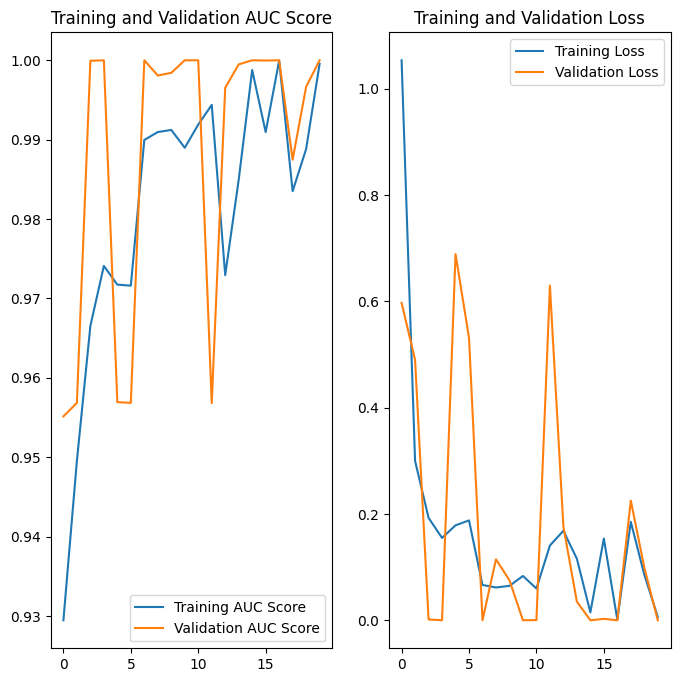

In [22]:
acc = history.history['auc']
val_acc = history.history['val_auc']

loss = history.history['loss']
val_loss = history.history['val_loss']

pre = history.history['precision']
val_precision = history.history['val_precision']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training AUC Score')
plt.plot(epochs_range, val_acc, label='Validation AUC Score')
plt.legend(loc='lower right')
plt.title('Training and Validation AUC Score')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()




Text(0.5, 1.0, 'Training and Validation precision Score')

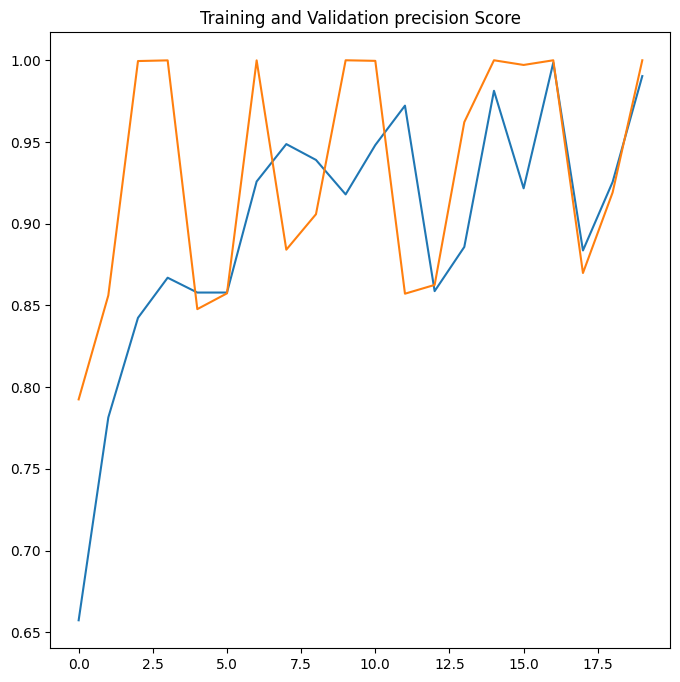

In [23]:
plt.figure(figsize=(8, 8))
#plt.subplot(1, 3, 3)
plt.plot(epochs_range, pre, label='Training precision Score')
plt.plot(epochs_range, val_precision, label='Validation precision Score')
#plt.legend(loc='lower right')
plt.title('Training and Validation precision Score')

**Observations:**

1. Achieved good precision score on test dataset (0.997 after last epoch).

2. Precision score curve is fluctuating between 0.85 to 1.00 even after 10 epochs.

3. Number of trainable parameters are 1,585.

4. Validation loss is lesser and achieved good AUC score.

# Model 2: 

From model 1, we achieved good precision score. Lets train model with different values of learning rate, number of neurons.


In [ ]:

import keras_tuner as kt

In [ ]:
def model_builder(hp):
  model2 = keras.Sequential()
  model2.add(keras.layers.Flatten(input_shape=[24]))
  model2.add(BatchNormalization())

  hp_units = hp.Int('units', min_value=4, max_value=16, step=1)

  model2.add(keras.layers.Dense(units=hp_units, activation='relu',kernel_initializer="he_normal"))
  model2.add(BatchNormalization())
  model2.add(Dropout(0.1))
  model2.add(keras.layers.Dense(units=hp_units, activation='relu',kernel_initializer="he_normal"))
  model2.add(BatchNormalization())
  model2.add(Dropout(0.1))
  model2.add(keras.layers.Dense(1, activation='sigmoid'))

  # Tune the learning rate for the optimizer
  
  hp_learning_rate = hp.Choice('learning_rate', values=[0.01,0.005,0.001])

  metrics = [
    keras.metrics.Precision(name="precision"),
    keras.metrics.Recall(name="recall"),
    keras.metrics.AUC(curve='ROC')]

  model2.compile(optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate),
                loss=keras.losses.BinaryCrossentropy(),
                metrics=metrics)

  return model2

In [ ]:
tuner = kt.RandomSearch(
    model_builder,
    objective='val_loss',
    max_trials=5)

In [ ]:
tuner.search(X_train_new.values, y_train, epochs=30, validation_data = (X_test_new.values, y_test), callbacks= callbacks, class_weight=class_weight)

# Get the optimal hyperparameters
best_hps=tuner.get_best_hyperparameters(num_trials=5)[0]

print(f"""
The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is {best_hps.get('units')} and the optimal learning rate for the optimizer
is {best_hps.get('learning_rate')}.
""")

Trial 5 Complete [00h 10m 25s]
val_loss: 0.18822820484638214

Best val_loss So Far: 0.05274367704987526
Total elapsed time: 01h 04m 57s

The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is 13 and the optimal learning rate for the optimizer
is 0.001.



In [24]:
model2 = Sequential()

model2.add(Dense(32, input_shape=(X_train_new.shape[-1],), activation='relu'))

model2.add(BatchNormalization())
# using dropouts after every layer which prevents overfitting in most of the cases.
model2.add(Dense(13, activation='relu',kernel_initializer="he_normal"))
model2.add(BatchNormalization())
model2.add(Dropout(0.1))
model2.add(Dense(8, activation='relu', kernel_initializer="he_normal"))
model2.add(BatchNormalization())
model2.add(Dropout(0.1))
model2.add(Dense(1, activation='sigmoid'))

In [25]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 32)                800       
                                                                 
 batch_normalization_3 (Batc  (None, 32)               128       
 hNormalization)                                                 
                                                                 
 dense_5 (Dense)             (None, 13)                429       
                                                                 
 batch_normalization_4 (Batc  (None, 13)               52        
 hNormalization)                                                 
                                                                 
 dropout_2 (Dropout)         (None, 13)                0         
                                                                 
 dense_6 (Dense)             (None, 8)                

In [30]:
metrics = [
    keras.metrics.Precision(name="precision"),
    keras.metrics.Recall(name="recall"),
    keras.metrics.AUC(curve='ROC')
]


### Compiling the model
### choosing an appropirate optimiser and loss function
model2.compile(optimizer=keras.optimizers.Adam(0.001),
              loss='binary_crossentropy',
              metrics=metrics)

In [31]:
### Training the model
epochs = 20
batch_size = 32
history = model2.fit(X_train_new.values,y_train, validation_data = (X_test_new.values, y_test), epochs=epochs, batch_size=batch_size, callbacks=callbacks, class_weight=class_weight)

Epoch 1/20
6250/6250 [==============================] - 15s 2ms/step - loss: 4.1051 - precision: 0.6342 - recall: 0.9950 - auc_2: 0.9181 - val_loss: 0.6890 - val_precision: 0.7591 - val_recall: 1.0000 - val_auc_2: 0.9468
Epoch 2/20
6250/6250 [==============================] - 12s 2ms/step - loss: 0.3712 - precision: 0.7429 - recall: 1.0000 - auc_2: 0.9437 - val_loss: 0.6927 - val_precision: 0.7688 - val_recall: 1.0000 - val_auc_2: 0.9508
Epoch 3/20
6250/6250 [==============================] - 16s 2ms/step - loss: 0.2463 - precision: 0.8102 - recall: 1.0000 - auc_2: 0.9603 - val_loss: 0.3927 - val_precision: 0.8571 - val_recall: 1.0000 - val_auc_2: 0.9670
Epoch 4/20
6250/6250 [==============================] - 12s 2ms/step - loss: 0.1546 - precision: 0.8663 - recall: 1.0000 - auc_2: 0.9762 - val_loss: 0.0355 - val_precision: 0.9642 - val_recall: 1.0000 - val_auc_2: 0.9991
Epoch 5/20
6250/6250 [==============================] - 18s 3ms/step - loss: 0.1695 - precision: 0.8615 - recall: 1.

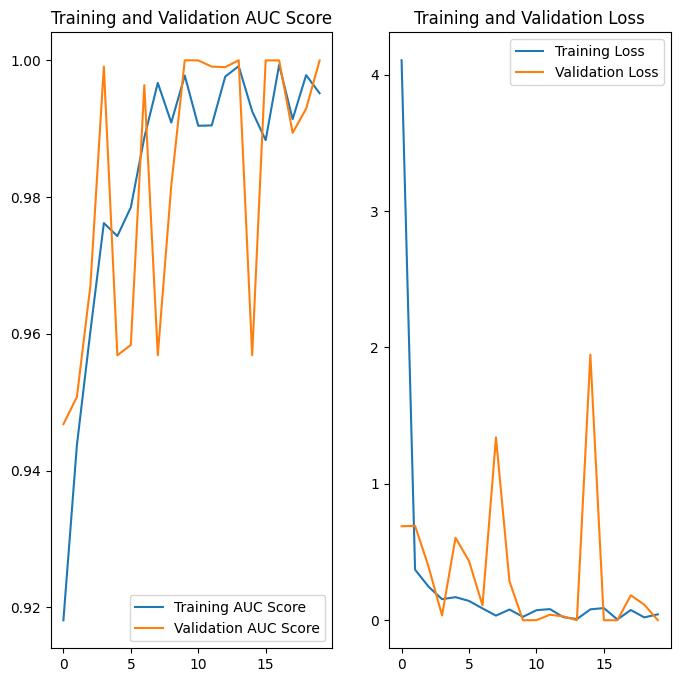

In [32]:
acc = history.history['auc_2']
val_acc = history.history['val_auc_2']

loss = history.history['loss']
val_loss = history.history['val_loss']

pre = history.history['precision']
val_precision = history.history['val_precision']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training AUC Score')
plt.plot(epochs_range, val_acc, label='Validation AUC Score')
plt.legend(loc='lower right')
plt.title('Training and Validation AUC Score')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


Text(0.5, 1.0, 'Training and Validation precision Score')

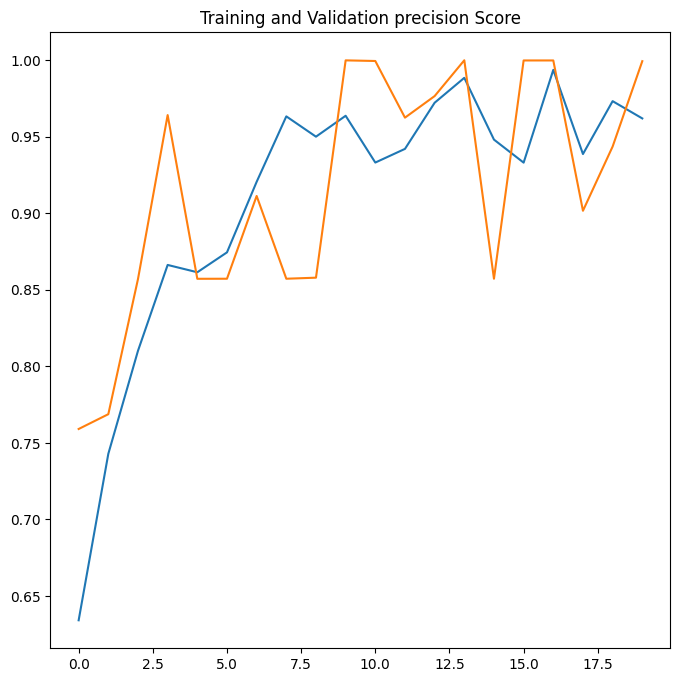

In [33]:
plt.figure(figsize=(8, 8))
#plt.subplot(1, 3, 3)
plt.plot(epochs_range, pre, label='Training precision Score')
plt.plot(epochs_range, val_precision, label='Validation precision Score')
#plt.legend(loc='lower right')
plt.title('Training and Validation precision Score')

**Saving model**

In [34]:
from keras.models import load_model
model2.save("model.h5")


In [36]:
loaded_model = load_model("/content/model.h5")
loss, accuracy,precision,recall = loaded_model.evaluate(X_test_new.values, y_test)

1563/1563 [==============================] - 2s 1ms/step - loss: 6.8486e-04 - precision: 0.9994 - recall: 1.0000 - auc_2: 1.0000


**Observations**

1. Achieved good precision score.
2. Hyper parameters are tunned properly.
3. Number of trainable parameters are reduced to 1456 and total parameters to 1562.